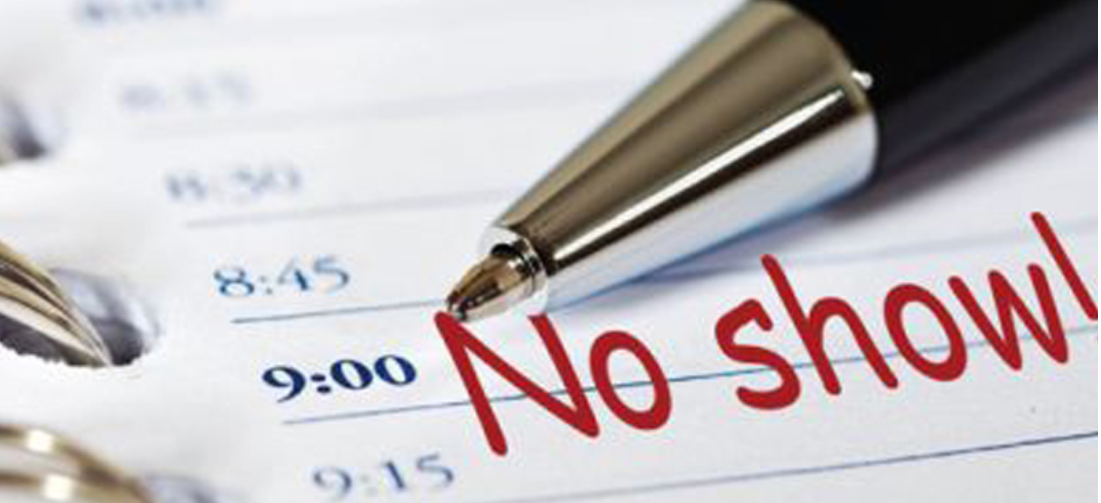

# Investigating Medical Patient's No-Show Appointments

## Divya Naidu
### Udacity's Project 2

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Patients who fail to show up to scheduled appointments, giving the health center no opportunity to fill the appointment slot, are often referred to as "no-shows". No-show appointments result in loss of time and money for the health center and disrupts continuity of care for patients.

High missed appointment rates have been identified as one of the most significant barriers to access to care for people. The no appointments dataset has collected information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. I would be investigating this data set to get insights and to better understand the appointment adherence in patients.

The different attributes of this dataset are :
1. PatientId: Identification of a patient
2. AppointmentID: Identification of each appointment
3. Gender: Male or Female
4. scheduledDay: Datetime when the appointment was scheduled
5. AppointmentDay: Datetime when the patient has to visit
6. Age: Age of the patient
7. Neighbourhood: Where the appointment takes place
8. Scholarship: True of False 
9. Hipertension: True or False
10. Diabetes: True or False
11. Alcoholism: True or False
12. Handcap: True or False
13. SMS_received: 1 or more messages sent to the patient
14. No-show: True or False

Looking at provided attributes, I am planning to divide them into different characteristics for my analysis:
* Visit Characteristics (Scheduled Day, Appointment Day)
* Patient Characteristics (Gender, Age)
* Health Characteristics (Hypertention, Diabetes, Alcoholism, Handicap)
* Provisions Provided (Scholarship, SMS Received)

Questions to be investigated:

* What characteristics leads to more no show appointments?
- Whether the provisions provided by the scheduling office influence the patients show ups?  
* How has trend been between no shows and show ups?
- What would be the suggested measures to improve the no show rates?

In [3]:
#importing required packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [4]:
#loading the data
df_noshow=pd.read_csv('noshowappointments.csv')

#Getting the first 5 rows to get a gist of the data
df_noshow.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [5]:
#Getting the number of rows and numbers of columns in the dataset
df_noshow.shape

(110527, 14)

In [6]:
#Getting a basic summary of the attributes in the dataset
df_noshow.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [7]:
#Getting the consice information of the dataset
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
#Getting the number of duplicate values if any in the dataset
sum(df_noshow.duplicated())

0

**Initial Observation:**
1. The no show appointment dataset has 110527 data entries and 14 attributes. 
2. From the info function it can be said that there are no null values in this dataset.
3. Also from the results of duplicated function it can be said that there are no duplicate values. 
4. The dependent variable in this data set is no-show and all others are independent(13 variables).

### Data Cleaning


The head function gives me gist of the dataset. Looking at the data I can say that there are few inconsistencies that needs to be corrected.
1. The columns names should be made lowercase and underscores should be used to make it easier to read and work with.
2. The data types of few columns need to be changed. 
3. PatientId need to changed to int as Id cannot be a float number. 
4. The data types of scheduledDay and AppointmentDay should be changed to datetime to get the data to correct use. I have refered the following websites for understanding the functions that can be used for conversion of a data type from string to datetime:
https://www.geeksforgeeks.org/python-convert-string-to-datetime-and-vice-versa/ & 
https://datatofish.com/strings-to-datetime-pandas/

In [9]:
#Changing the column names
#df_noshow.columns
new_columns=['patient_id','appointment_id','gender','scheduled_day','appointment_day','age','neighbourhood','scholarship','hypertension','diabetes','alcoholism','handicap','sms_received','no_show']
df_noshow.columns = new_columns

#Verifing the changes
df_noshow.head(1)

patient_id  appointment_id gender         scheduled_day  \
0  2.987250e+13         5642903      F  2016-04-29T18:38:08Z   

        appointment_day  age    neighbourhood  scholarship  hypertension  \
0  2016-04-29T00:00:00Z   62  JARDIM DA PENHA            0             1   

   diabetes  alcoholism  handicap  sms_received no_show  
0         0           0         0             0      No

In [10]:
#Changing the data type of patient_id
df_noshow['patient_id'] = df_noshow['patient_id'].astype(int)

#Verifing the changes
df_noshow.patient_id.dtypes

dtype('int64')

In [11]:
#Change the data type of scheduled_day and appointment_day to datetime
df_noshow['scheduled_day']= pd.to_datetime(df_noshow['scheduled_day'],format='%Y-%m-%dT%H:%M:%SZ')
df_noshow['appointment_day']=pd.to_datetime(df_noshow['appointment_day'],format='%Y-%m-%dT%H:%M:%SZ')

#Verifing the changes
df_noshow.head(2)

patient_id  appointment_id gender       scheduled_day appointment_day  \
0   29872499824296         5642903      F 2016-04-29 18:38:08      2016-04-29   
1  558997776694438         5642503      M 2016-04-29 16:08:27      2016-04-29   

   age    neighbourhood  scholarship  hypertension  diabetes  alcoholism  \
0   62  JARDIM DA PENHA            0             1         0           0   
1   56  JARDIM DA PENHA            0             0         0           0   

   handicap  sms_received no_show  
0         0             0      No  
1         0             0      No

We can see from the above results that the appointment_day had 00:00:00 timestamp so it is directly ignored. We can do the same for scheduled_day as the timing does not hold any specific significance in our analysis.

In [12]:
#Getting date from the scheduled_day coloumn
df_noshow['scheduled_day']=df_noshow['scheduled_day'].apply(lambda x: x.strftime('%Y-%m-%d'))
df_noshow.head(2)

patient_id  appointment_id gender scheduled_day appointment_day  age  \
0   29872499824296         5642903      F    2016-04-29      2016-04-29   62   
1  558997776694438         5642503      M    2016-04-29      2016-04-29   56   

     neighbourhood  scholarship  hypertension  diabetes  alcoholism  handicap  \
0  JARDIM DA PENHA            0             1         0           0         0   
1  JARDIM DA PENHA            0             0         0           0         0   

   sms_received no_show  
0             0      No  
1             0      No

In [13]:
#Checking the data type of the coloumns
df_noshow.dtypes

patient_id                  int64
appointment_id              int64
gender                     object
scheduled_day              object
appointment_day    datetime64[ns]
age                         int64
neighbourhood              object
scholarship                 int64
hypertension                int64
diabetes                    int64
alcoholism                  int64
handicap                    int64
sms_received                int64
no_show                    object
dtype: object

As seen the data type of scheduled_day has changed to string, as the return type of strftime function in pandas is string.[Pandas strftime function documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.strftime.html)

In [14]:
#Changing the data type of scheduled_day to datetime
df_noshow['scheduled_day']= pd.to_datetime(df_noshow['scheduled_day'],format='%Y-%m-%d')
df_noshow.dtypes

patient_id                  int64
appointment_id              int64
gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighbourhood              object
scholarship                 int64
hypertension                int64
diabetes                    int64
alcoholism                  int64
handicap                    int64
sms_received                int64
no_show                    object
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis



### What characteristics leads to more no-show appointments?

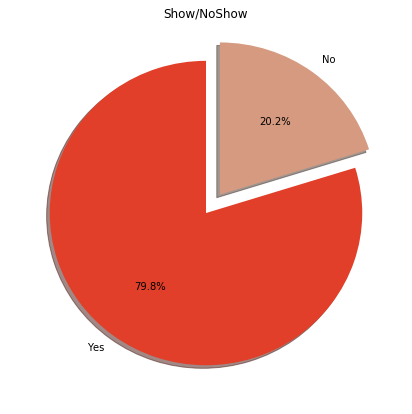

In [32]:
#Pie chart of Shows and No shows
plt.figure(figsize=(7,7))
colors = ["#E13F29", "#D69A80"]
counts=df_noshow['no_show'].value_counts()
plot_label = ['Yes', 'No']
plt.pie(counts, labels = plot_label, startangle = 90,colors=colors, shadow = True,autopct='%1.1f%%', explode = (0, 0.15))
plt.title("Show/NoShow");

From the above pie chart it can be clearly said that around 80% of people usually show up for their scheduled appointment.

As mentioned in the introduction, I have divided the attributes into different characteristics for analysis.
1.	Visit Characteristics
  * scheduled_day helps us with the date when the appointment was scheduled.
  * appointment_day tells us the date on which patients needs to show up.
  * We can get the number of no shows with the scheduled_day and appointment_day but that will not get us any helpful insight. Instead if we calculate the waiting time between these two dates, we can check its relationship with no show.
  * Further we use the day of the week of the appointment_day we can try and get a pattern as per the weekdays whether the patients show up or not.

In [35]:
#Calulating the wait time between scheduled day and appointment day
wait_time = df_noshow['appointment_day'] - df_noshow['scheduled_day']

In [36]:
#Adding a new coloumn , wait_time
df_noshow['wait_time']=wait_time
df_noshow.head(2)

patient_id  appointment_id gender scheduled_day appointment_day  age  \
0   29872499824296         5642903      F    2016-04-29      2016-04-29   62   
1  558997776694438         5642503      M    2016-04-29      2016-04-29   56   

     neighbourhood  scholarship  hypertension  diabetes  alcoholism  handicap  \
0  JARDIM DA PENHA            0             1         0           0         0   
1  JARDIM DA PENHA            0             0         0           0         0   

   sms_received no_show wait_time  
0             0      No    0 days  
1             0      No    0 days

In [37]:
#Using groupby function to get a count of shows and no shows as per wait time
wt_df=df_noshow.groupby(['wait_time','no_show'])['no_show'].count().reset_index(name="count")
wt_df.head()

wait_time no_show  count
0   -6 days     Yes      1
1   -1 days     Yes      4
2    0 days      No  36771
3    0 days     Yes   1792
4    1 days      No   4100

As seen there are few negative entries in the wait time, which says that the appointment date was before the scheduled date. As this is not possible we will be ignoring those negative value for our analysis.

In [38]:
#Getting all the values greater than and equal to 0 day wait time
wt_df=wt_df[wt_df['wait_time'] >= "0"]
wt_df.head()

wait_time no_show  count
2    0 days      No  36771
3    0 days     Yes   1792
4    1 days      No   4100
5    1 days     Yes   1113
6    2 days      No   5123

In [39]:
#Getting two seperate dataframes for noshow and show respectively
wt_noshow=wt_df.query('no_show == "Yes"')
wt_noshow.groupby('wait_time').count()
wt_noshow.head(2)

wait_time no_show  count
3    0 days     Yes   1792
5    1 days     Yes   1113

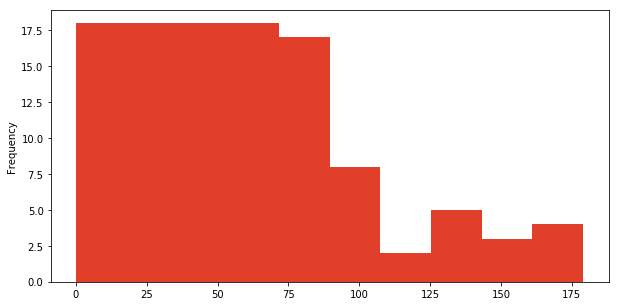

In [55]:
#Plotting the histogram for wait_time with no show data
plt.figure(figsize=(10,5))
wt_noshow['wait_time'].astype('timedelta64[D]').plot.hist(color = ["#E13F29"]);

In [43]:
wt_show=wt_df.query('no_show == "No"')
wt_show.groupby('wait_time').count()
wt_show.head(2)

wait_time no_show  count
2    0 days      No  36771
4    1 days      No   4100

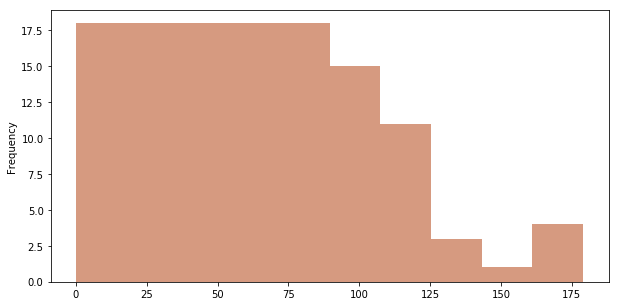

In [81]:
#Plotting the histogram for wait_time with show data
plt.figure(figsize=(10,5))
wt_show['wait_time'].astype('timedelta64[D]').plot.hist(color=["#D69A80"]);

As the data type of wait_time was timedelta, I have referred the below link to get the histogram correctly. The [D] tells that the timedelta is in Days format.
https://stackoverflow.com/questions/23543909/plotting-pandas-timedelta

We can conclude from the above results that there are more no-show ups if the waiting days increases beyond 70 days.

Similarly, we will be checking the number of show ups and no-show ups as per the weekday. The day of the week on which the appointment was scheduled or the appointment day itself can have impacts on no shows. 
I referred to the [Pandas day_name() function documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html) to get the weekday from the dates.

In [48]:
#Getting the week day from the dates using 
#dt from datetime package and day_name from pandas
scheduled_weekday=df_noshow['scheduled_day'].dt.day_name()
appointment_weekday=df_noshow['appointment_day'].dt.day_name()

In [49]:
#Adding new coloumns, scheduled_weekday and appointment_weekday, to the dataframe
df_noshow['scheduled_weekday']=scheduled_weekday
df_noshow['appointment_weekday']=appointment_weekday
df_noshow.head(2)

patient_id  appointment_id gender scheduled_day appointment_day  age  \
0   29872499824296         5642903      F    2016-04-29      2016-04-29   62   
1  558997776694438         5642503      M    2016-04-29      2016-04-29   56   

     neighbourhood  scholarship  hypertension  diabetes  alcoholism  handicap  \
0  JARDIM DA PENHA            0             1         0           0         0   
1  JARDIM DA PENHA            0             0         0           0         0   

   sms_received no_show wait_time scheduled_weekday appointment_weekday  
0             0      No    0 days            Friday              Friday  
1             0      No    0 days            Friday              Friday

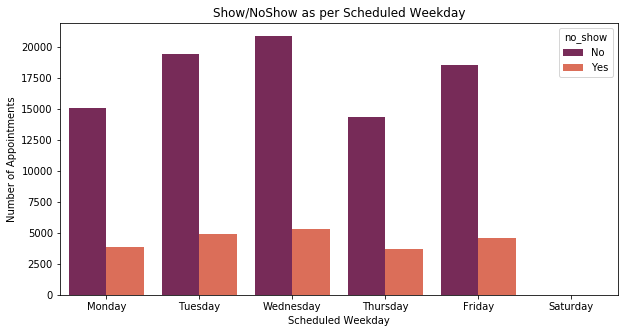

In [53]:
#Getting a bar plot comparing the shows and no shows as per the scheduled weekday
#Using the countplot function from seaborn package 
plt.figure(figsize=(10,5))
dow_Splot = sns.countplot(x=df_noshow.scheduled_weekday, hue=df_noshow.no_show, data=df_noshow, palette="rocket")
dow_Splot.set_title("Show/NoShow as per Scheduled Weekday")
dow_Splot.set_xlabel('Scheduled Weekday')
dow_Splot.set_ylabel('Number of Appointments')
labels=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday']
dow_Splot.set_xticklabels(labels);

I wanted to get both the no show and show ups on a single plot with the weekday. I reffered the below link for getting and understanding the countplot() function from the seaborn package.
https://seaborn.pydata.org/generated/seaborn.countplot.html

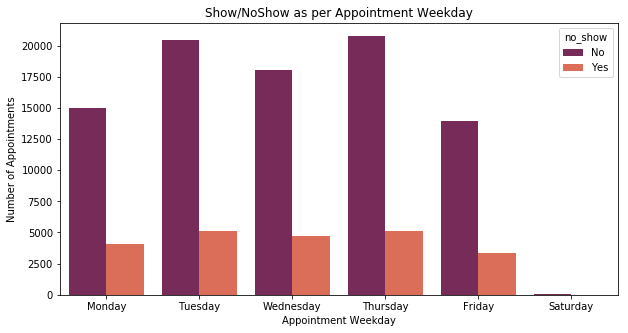

In [57]:
#Getting a bar plot comparing the shows and no shows as per the Appointment weekday
#Using the countplot function from seaborn package 
plt.figure(figsize=(10,5))
dow_Aplot = sns.countplot(x=df_noshow.appointment_weekday, hue=df_noshow.no_show, data=df_noshow, palette="rocket")
dow_Aplot.set_title("Show/NoShow as per Appointment Weekday")
dow_Aplot.set_xlabel('Appointment Weekday')
dow_Aplot.set_ylabel('Number of Appointments')
labels=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday']
dow_Aplot.set_xticklabels(labels);

 From the above plot, it can be seen that there are more no show ups in the middle of the week

2. Patient Characteristics

  * Gender – male/female – We can calculate the number of no shows and show ups according to the gender and find out whether it has any significance.
  * Age – We can categorize age into groups by creating bins and then analyze which age group patients are more likely to miss the appointment.

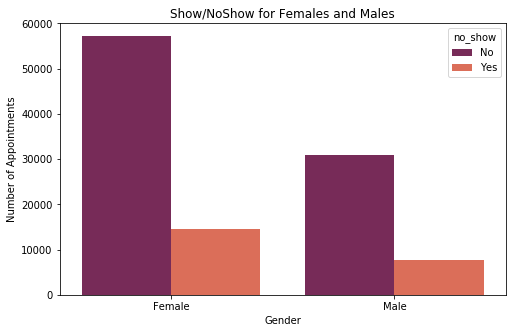

In [58]:
#Getting a bar plot comparing the shows and no shows as per the Gender of the patient
#Using the countplot function from seaborn package 
plt.figure(figsize=(8,5))
gender_plot = sns.countplot(x=df_noshow.gender, hue=df_noshow.no_show, data=df_noshow, palette="rocket")
gender_plot.set_title("Show/NoShow for Females and Males")
gender_plot.set_xlabel('Gender')
gender_plot.set_ylabel('Number of Appointments')
labels=['Female', 'Male']
gender_plot.set_xticklabels(labels);

The highlight here is that more number of females tend to go for a health checkup than males. Comparing the show ups and no show ups for females with the show ups and no show ups of males, it is clearly seen that more number of males don't show up for their scheduled appointments. Thus, gender can be one of the potential influencers in our analyis.

While trying to get a good plot for age I noticed that if we categorize the age data we would get a better visualization on the data spread. 

In [60]:
#Getting unique values present in the age column
age=df_noshow.age.unique()
age.sort()
age

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115])

Population specific considerations are an important part of patient care. I have divided the age into groups as per the specifications provided in the Population Specific Book. The pdf link of this [book](https://www.upstate.edu/hr/document/pop_spec_clin_ss.pdf).

* Infant 0 – 1 year
* Toddler 1 year – 3 years
* Preschool 3 years – 5 years
* School age 5 years – 12 years
* Adolescent 13 years – 18 years
* Young adult 19 years – 44 years
* Middle adult 45 years – 65 years
* Old adult 65 years – 85 years
* Old elder < 85 years

In [61]:
#Creating bins for age
bin_names=['Infant','Toddler','Pre_school','School_aged','Adolescent','Young_adult','Middle_adult','Old_adult','Old_elder']
bin_edges=[0,1,3,5,12,18,44,65,85,115]

#Using the cut function to create categories
df_noshow['age_group']=pd.cut(df_noshow['age'],bin_edges,labels=bin_names)

#Getting the count of each category
df_noshow['age_group'].value_counts()

Young_adult     37266
Middle_adult    31093
Old_adult       12141
School_aged      9305
Adolescent       7830
Toddler          3131
Pre_school       2788
Infant           2273
Old_elder        1160
Name: age_group, dtype: int64

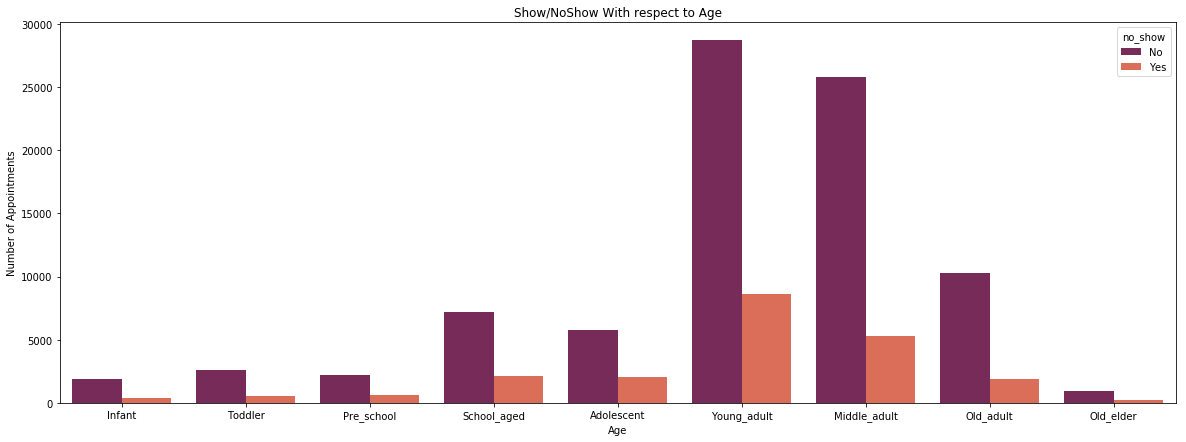

In [62]:
#Getting a bar plot comparing the shows and no shows as per the age_group
#Using the countplot function from seaborn package 
plt.figure(figsize=(20,7))
gender_plot = sns.countplot(x=df_noshow.age_group, hue=df_noshow.no_show, data=df_noshow, palette="rocket")
gender_plot.set_title("Show/NoShow With respect to Age")
gender_plot.set_xlabel('Age')
gender_plot.set_ylabel('Number of Appointments');

From the above graph we can easily say the ratio of show and no show is nearly same for all age groups. The age groups have almost 75% show rate. But we can also conclude that the young adults have the most no shows.

3. Health Characteristics
  * Hypertension
  * Diabetes
  * Alcoholism
  * Handicap
  * We can check the number of no shows and show ups for all of the above characteristics and check for its significance


In [63]:
#Getting the count of patients with and without Hypertension
df_noshow['hypertension'].value_counts()

0    88726
1    21801
Name: hypertension, dtype: int64

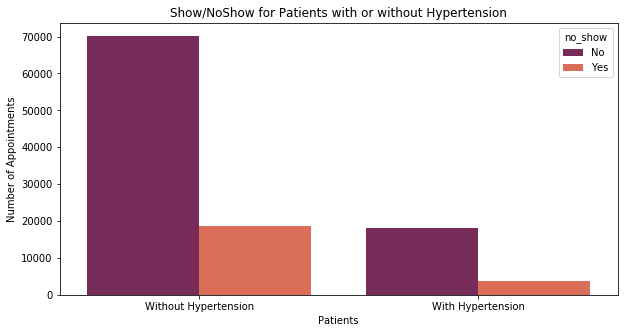

In [64]:
#Getting a bar plot comparing the shows and no shows for patients with and without Hypertension  
#Using the countplot function from seaborn package 
plt.figure(figsize=(10,5))
gender_plot = sns.countplot(x=df_noshow.hypertension, hue=df_noshow.no_show, data=df_noshow, palette="rocket")
gender_plot.set_title("Show/NoShow for Patients with or without Hypertension")
gender_plot.set_xlabel('Patients')
gender_plot.set_ylabel('Number of Appointments')
labels=['Without Hypertension', 'With Hypertension']
gender_plot.set_xticklabels(labels);

In [65]:
#Getting the count of patients with and without Diabetes
df_noshow['diabetes'].value_counts()

0    102584
1      7943
Name: diabetes, dtype: int64

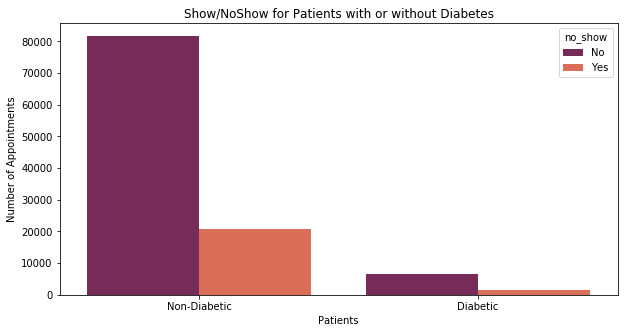

In [66]:
#Getting a bar plot comparing the shows and no shows for Patients with or without Diabetes
#Using the countplot function from seaborn package 
plt.figure(figsize=(10,5))
gender_plot = sns.countplot(x=df_noshow.diabetes, hue=df_noshow.no_show, data=df_noshow, palette="rocket")
gender_plot.set_title("Show/NoShow for Patients with or without Diabetes")
gender_plot.set_xlabel('Patients')
gender_plot.set_ylabel('Number of Appointments')
labels=['Non-Diabetic', 'Diabetic']
gender_plot.set_xticklabels(labels);

In [67]:
#Getting the count of Alcoholic and Non-Alcoholics Patients
df_noshow['alcoholism'].value_counts()

0    107167
1      3360
Name: alcoholism, dtype: int64

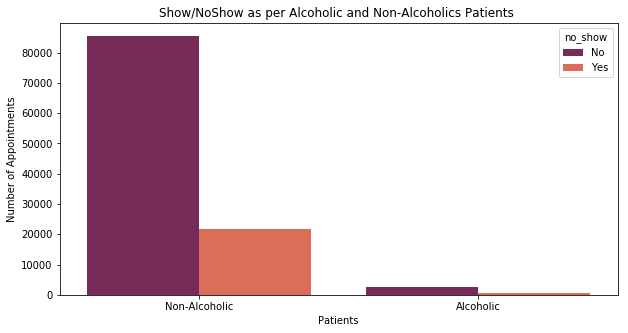

In [68]:
#Getting a bar plot comparing the shows and no shows for Alcoholic and Non-Alcoholics Patients
#Using the countplot function from seaborn package 
plt.figure(figsize=(10,5))
gender_plot = sns.countplot(x=df_noshow.alcoholism, hue=df_noshow.no_show, data=df_noshow, palette="rocket")
gender_plot.set_title("Show/NoShow as per Alcoholic and Non-Alcoholics Patients ")
gender_plot.set_xlabel('Patients')
gender_plot.set_ylabel('Number of Appointments')
labels=['Non-Alcoholic', 'Alcoholic']
gender_plot.set_xticklabels(labels);

In [69]:
#Getting the count of Patients with or without Disability
df_noshow['handicap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

For getting a better insight on the handicap data, I am getting all different types of disabilities into one handicap group. Categorizing the handicap into just two categories handicap and non-handicap. 

In [70]:
#creating bins for handicap
bin_names=['non-handicap','handicap']
bin_edges=[0,1,4]

#Using the cut function to categorize the data
df_noshow['handicap_group']=pd.cut(df_noshow['handicap'],bin_edges,labels=bin_names)

Text(0,0.5,'Number of Appointmnets')

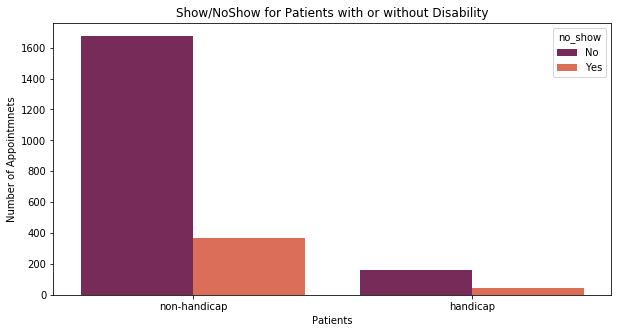

In [71]:
#Getting a bar plot comparing the shows and no shows for Patients with or without Disability
#Using the countplot function from seaborn package 
plt.figure(figsize=(10,5))
gender_plot = sns.countplot(x=df_noshow.handicap_group, hue=df_noshow.no_show, data=df_noshow, palette="rocket")
gender_plot.set_title("Show/NoShow for Patients with or without Disability")
gender_plot.set_xlabel('Patients')
gender_plot.set_ylabel('Number of Appointmnets')

From the above visualizations we can clearly say that almost 20 % of patients without Hypertension, Diabetes, Alcoholism and Disability don't show up for the appointment. These characteristics gives us some insights on the no shows.

There can be other factors, that are not present in this dataset, which leads to no shows. Factors such as logistical issues, lack of understanding of the scheduling system, patients not feeling respected by healthcare providers or the health system, affordability, timeliness, patients forgetting appointment and patient severity of illness can also lead to missed appointments.

4. Provisions Provided
  * Scholarship - indicates whether or not the patient is enrolled in Brazilian welfare program Bolsa Família.
  * SMS_received - SMS reminder services are provided by the scheduling office for the patients
  * Checking the significance of both these provisions that are provided to the patients on no shows and show ups.

This also gets me to my second investigation question.

### Whether the provisions provided by the scheduling office influence the patients show ups?

In [72]:
#Getting the count of Patients with or without Scholarship
df_noshow['scholarship'].value_counts()

0    99666
1    10861
Name: scholarship, dtype: int64

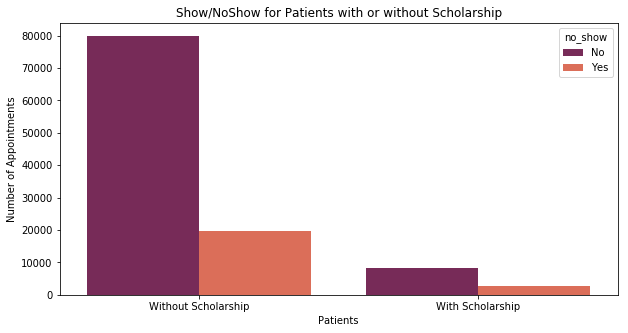

In [73]:
#Getting a bar plot comparing the shows and no shows for Patients with or without Scholarship
#Using the countplot function from seaborn package 
plt.figure(figsize=(10,5))
gender_plot = sns.countplot(x=df_noshow.scholarship, hue=df_noshow.no_show, data=df_noshow, palette="rocket")
gender_plot.set_title("Show/NoShow for Patients with or without Scholarship")
gender_plot.set_xlabel('Patients')
gender_plot.set_ylabel('Number of Appointments')
labels=['Without Scholarship', 'With Scholarship']
gender_plot.set_xticklabels(labels);

In [74]:
#Getting the count of Patients with or without SMS Provision
df_noshow['sms_received'].value_counts()

0    75045
1    35482
Name: sms_received, dtype: int64

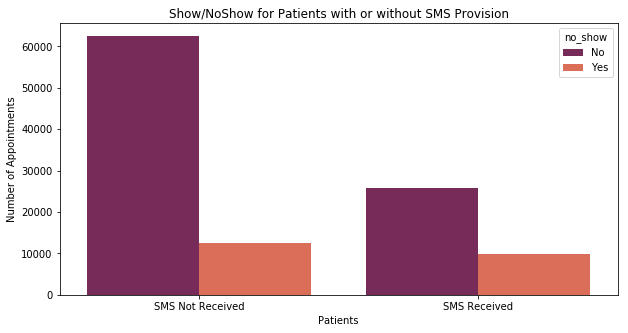

In [75]:
#Getting a bar plot comparing the shows and no shows for Patients with or without SMS Provision
#Using the countplot function from seaborn package 
plt.figure(figsize=(10,5))
gender_plot = sns.countplot(x=df_noshow.sms_received, hue=df_noshow.no_show, data=df_noshow, palette="rocket")
gender_plot.set_title("Show/NoShow for Patients with or without SMS Provision")
gender_plot.set_xlabel('Patients')
gender_plot.set_ylabel('Number of Appointments')
labels=['SMS Not Received', 'SMS Received']
gender_plot.set_xticklabels(labels);

Firstly, its clearly seen in the plots that very few people are provided with the provisions. The scholarship provisions are usually provided to the underserved population, so we cannot have a greater increase there, but we can increase the SMS provisions.

From the above visualizations it can be seen that about 75000 people who did not receive SMS have around 80% show up rate. Whereas the 35000 people who received SMS have around 60% show up rate. This looks quiet opposite to what should be the actual case. People who do receive a SMS usually tend to visit the hospital more than those who have not received an SMS. This may be because the staff did not have the updated contact of the patient or may be the timing at which the reminder was sent was an issue.

###  How has trend been between no shows and show ups?

In [76]:
#Creating a new dataframe with appointment day, no show and No show count as per appointment day
trend_df=df_noshow.groupby(['appointment_day','no_show'])['no_show'].count().reset_index(name="count")
trend_df.head(2)

appointment_day no_show  count
0      2016-04-29      No   2602
1      2016-04-29     Yes    633

In [77]:
#Creating a seperate dataframe for no show
trend_noshow=trend_df.query('no_show == "Yes"')
trend_noshow.groupby('appointment_day').count()
trend_noshow.head(2)

appointment_day no_show  count
1      2016-04-29     Yes    633
3      2016-05-02     Yes    861

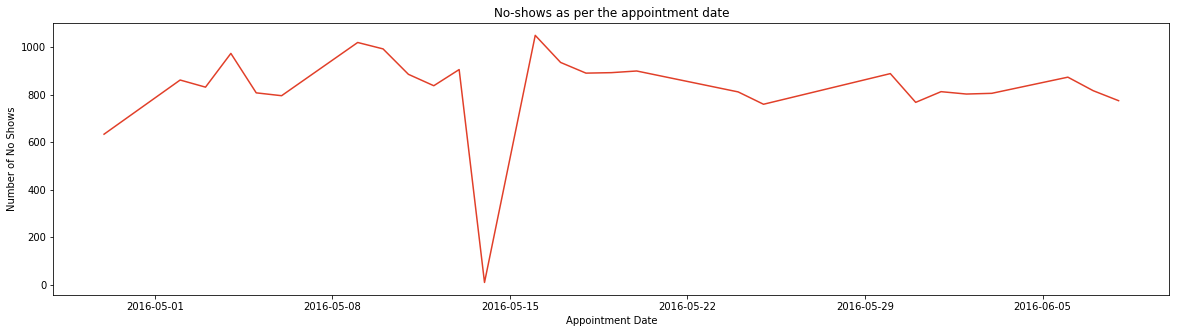

In [80]:
#Getting a line plot for No-shows as per appointment date to see if there is a trend
plt.figure(figsize=(20,5))
trend_noshow_plot=plt.plot(trend_noshow.appointment_day,trend_noshow['count'],color="#E13F29")
plt.title('No-shows as per the appointment date')
plt.xlabel('Appointment Date')
plt.ylabel('Number of No Shows');

In [82]:
#Creating a seperate dataframe for show ups
trend_show=trend_df.query('no_show == "No"')
trend_show.groupby('appointment_day').count()
trend_show.head(2)

appointment_day no_show  count
0      2016-04-29      No   2602
2      2016-05-02      No   3515

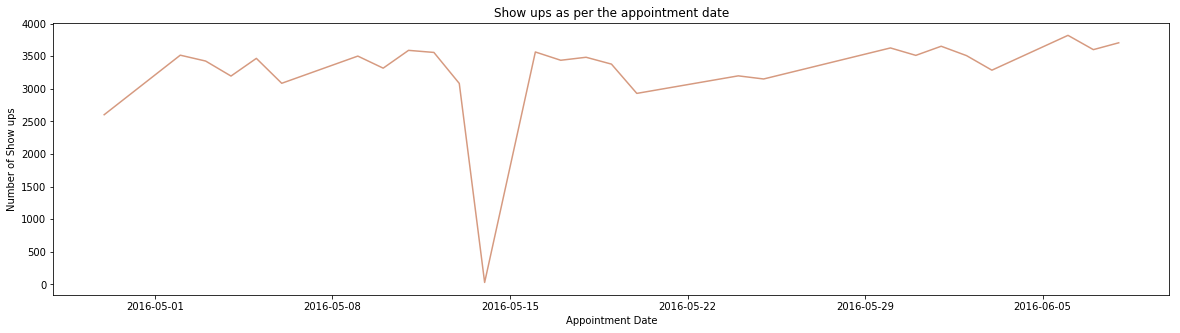

In [83]:
#Getting a line plot for Shows as per appointment date to see if there is a trend
plt.figure(figsize=(20,5))
trend_show_plot=plt.plot(trend_show.appointment_day,trend_show['count'],color="#D69A80")
plt.title('Show ups as per the appointment date')
plt.xlabel('Appointment Date')
plt.ylabel('Number of Show ups');

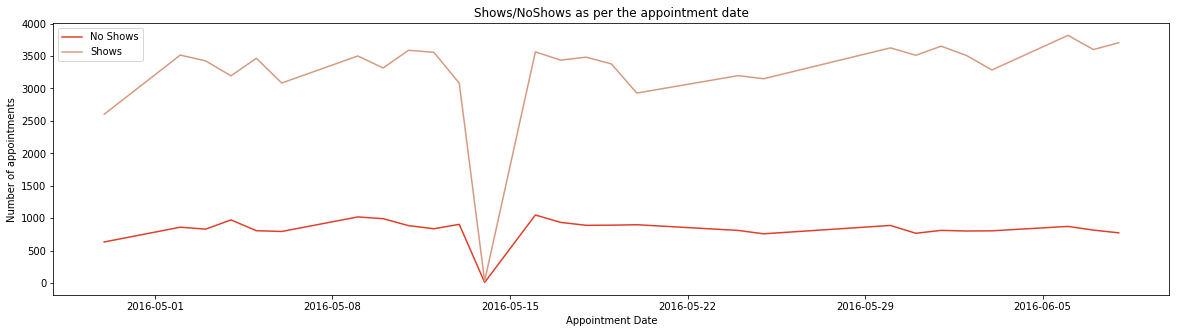

In [85]:
plt.figure(figsize=(20,5))
ns_plot, =plt.plot(trend_noshow.appointment_day,trend_noshow['count'],label ='No Shows', color="#E13F29")
s_plot, =plt.plot(trend_show.appointment_day,trend_show['count'],label ='Shows', color="#D69A80")
plt.title('Shows/NoShows as per the appointment date')
plt.xlabel('Appointment Date')
plt.ylabel('Number of appointments')
plt.legend(handles=[ns_plot, s_plot]);

To get both the plots in the same frame I refered to the links:
https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure & https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.legend.html


From the above visualization we can say that there are many ups and downs in the show up data. Whereas the trend in no-shows is increasing gradually. The data provided is for a very less period of time, but still we can see the increment in the no-show trend line, which means we need to find a solution for decreasing the no show as soon as possible.

### 	What would be the suggested measures to improve the no show rates?

After analyzing the data, I can say that various factors such as age, gender, the wait time, days of week effects the show rate. But to improve the show rates one of the most important measure would be to improve the appointment reminder system that used by the staff. Also, the staff need to update the patient contact on every visit or during the appointment set up. They can also have a written no-show policy and share the same with the patients on scheduling the appointment, so that they adhere to it.

<a id='conclusions'></a>
## Conclusions
Finding ways to improve performance is critical in the plight to provide greater access to care. Optimizing scheduling systems has been identified as one system level approach to address access needs. For example, reducing the number of missed appointments is crucial as when appointment slots go unused it effectively reduces access to others in need of an appointment.

After investigating the dataset, I can conclude that factors such as age, gender, wait time, days of week, and various health reasons have effect on the show rates.
One of the most shocking revelation was more people with SMS reminders not showing up for the appointment. But again, as the data provided is for a noticeably short time frame, we can't forecast the same for future. I did not do any analysis with respect to neighborhood as the hospital address was not provided, so there was no point of distance comparison. But logistics can be one of the factors that affect the show rate.

As this was only an exploratory analysis most of the potential factors remain undiscovered.

## References

Markdown Cheatsheet - https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#lines

Adding Image to the markdown - https://stackoverflow.com/questions/10628262/inserting-image-into-ipython-notebook-markdown

Pie Plots Research - https://blog.algorexhealth.com/2018/03/almost-10-pie-charts-in-10-python-libraries/ &                      https://matplotlib.org/3.1.0/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

Visualization colors - https://chrisalbon.com/python/data_visualization/matplotlib_pie_chart/  &  https://seaborn.pydata.org/examples/color_palettes.html

In [87]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0